# Esercizio

1. Python code and additional data exploration
2. Relational database
3. SQL queries

## Exercise 1
Write a program (you can choose to use the programming language you would prefer or in pseudo code) which performs the following tasks: 

### 1. Download the Movielens datasets from the url ‘http://files.grouplens.org/datasets/movielens/ml-25m.zip’ 


Downloading and unzipping the folder:

In [1]:
import urllib.request

print('Beginning file download...')

url = 'http://files.grouplens.org/datasets/movielens/ml-25m.zip'
urllib.request.urlretrieve(url, 'ml-25m')

Beginning file download...


('ml-25m', <http.client.HTTPMessage at 0x1e4f6ed9788>)

### 2. Download the Movielens checksum from the url ‘http://files.grouplens.org/datasets/movielens/ml-25m.zip.md5’


In [2]:
url = 'http://files.grouplens.org/datasets/movielens/ml-25m.zip.md5'

Downloading locally and reading the checksum:

In [3]:
urllib.request.urlretrieve(url, 'checksum')
checksum = open('checksum', 'r')
real_checksum = checksum.read()
print(real_checksum)

6b51fb2759a8657d3bfcbfc42b592ada  ml-25m.zip



### 3. Check whether the checksum of the archive corresponds to the downloaded one

#### Calculated hash

In [4]:
import hashlib

hasher1 = hashlib.md5()
afile1 = open('ml-25m', 'rb')
buf1 = afile1.read()
a = hasher1.update(buf1)
my_hash = hasher1.hexdigest()
print(str(my_hash))

6b51fb2759a8657d3bfcbfc42b592ada


#### Comparison

In [5]:
print(str(my_hash) == str(real_checksum))

False


Adjustments for the real_checksum string, we have to remove the last part of the hash which is just the name of the file 

In [6]:
print('before: ' + real_checksum)
real_checksum = real_checksum[:-13]
print('now: ' + real_checksum)

before: 6b51fb2759a8657d3bfcbfc42b592ada  ml-25m.zip

now: 6b51fb2759a8657d3bfcbfc42b592ada


In [7]:
print(str(my_hash) == str(real_checksum))

True


##### We now have the confirm the two checksums are equal and we can proceed

###  4. In case of positive check, print the names of the files contained by the downloaded archive

#### Extracting files from zip folder

In [8]:
import zipfile
with zipfile.ZipFile('ml-25m', 'r') as zip_ref:
    zip_ref.extractall('ml-25_unzipped')

#### Filenames

In [9]:
import os
from os import listdir
print(os.listdir('ml-25_unzipped/ml-25m'))

['genome-scores.csv', 'genome-tags.csv', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


## Data exploration
I'm going to perform a basic data exploration in order to be better prepared on what I'm going to face during the Relational Database's design. 
For each dataset I've performed:
1. Variables first look
2. Shape
3. Data types
4. Nulls
5. Duplicates

In [13]:
import pandas as pd
g_scores = pd.read_csv('ml-25_unzipped/ml-25m/genome-scores.csv',  encoding="ISO-8859-1")
g_tags = pd.read_csv('ml-25_unzipped/ml-25m/genome-tags.csv',  encoding="ISO-8859-1")
links = pd.read_csv('ml-25_unzipped/ml-25m/links.csv',  encoding="ISO-8859-1")
movies = pd.read_csv('ml-25_unzipped/ml-25m/movies.csv',  encoding="ISO-8859-1")
ratings = pd.read_csv('ml-25_unzipped/ml-25m/ratings.csv',  encoding="ISO-8859-1")
tags = pd.read_csv('ml-25_unzipped/ml-25m/tags.csv',  encoding="ISO-8859-1")

### G_scores

In [70]:
g_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [41]:
g_scores.shape

(15584448, 3)

#### Data types 

In [64]:
g_scores.dtypes

movieId        int64
tagId          int64
relevance    float64
dtype: object

#### Nulls

In [26]:
g_scores.isna().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

#### Duplicates

In [28]:
g_scores.duplicated().sum()

0

### G_tags

In [50]:
g_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [42]:
g_tags.shape

(1128, 2)

#### Data types 

In [63]:
g_tags.dtypes

tagId     int64
tag      object
dtype: object

#### Nulls

In [29]:
g_tags.isna().sum()

tagId    0
tag      0
dtype: int64

#### Duplicates

In [31]:
g_tags.duplicated().sum()

0

### Links

In [106]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [43]:
links.shape

(62423, 3)

#### Data types 

In [59]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

#### Nulls

In [32]:
links.isna().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

#### Duplicates

In [33]:
links.duplicated().sum()

0

### Movies

In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
movies.shape

(62423, 3)

#### Data types 

In [65]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

#### Nulls

In [34]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

#### Duplicates

In [35]:
movies.duplicated().sum()

0

### Ratings

In [93]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [45]:
ratings.shape

(25000095, 4)

#### Data types 

In [66]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

#### Nulls

In [36]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### Duplicates

In [39]:
ratings.duplicated().sum()

0

### Tags

In [86]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [46]:
tags.shape

(1093360, 4)

#### Data types 

In [68]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

#### Nulls

In [47]:
tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

#### Duplicates

In [48]:
tags.duplicated().sum()

0

## Exercise 2 
If you had to design a relational database schema (SQL) to store your results, what would it be? 


### Relational database schema
For the MovieLens use case I have decided to approach the design as a datawarehousing situation.

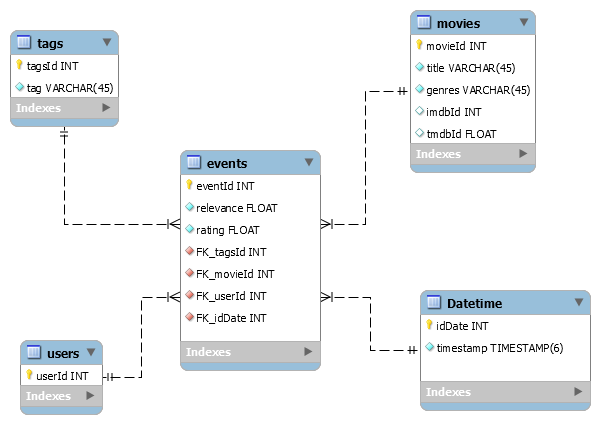

In [105]:
from IPython.display import Image
Image("Relational DB.png")

The schema proposed is following the structure of a star schema. I've chosen this type of modelling in order to provide a better business use of the database. In fact, in terms of business providing this star schema we can build a central transaction table (fact table) which record each of the event of the datasets. The fact table is recording unique rows for each combination of movieId, tagsId, userId, idDate (foreign keys of each dimension) and the metrics important for a business use case, which in this case are the ratings and the relevance. The simplicy of this schema helps us also to organize each entity in a way that provides us the possibility to join tables with in general 2 joins maximum, and this will be seen in the 3rd exercise. Moreover this schema simplifies day-by-day business reporting and period by period analysis.

Going deeply:
1. I have decided to create generated autoincremental IDs for those entities that didn't have an ID;
2. Inserted all the information of links dataset inside movies entity because each link is associated with only one movie, and are nullable because can happen that one movie is not associated with a link;
3. Used Non-identified relationships between tables because I have generated the ID for the fact table;
4. One to many relationship, as the star schema definition, because for each dimension we can find many events (Example: each movie can have many ratings).

In a technical point of view we can have many benefits, one of them as mentioned before is the optimization of queries performance, then it is easier for implementation and knowing that each dimension is not very large, now and for this use case also in the future, the actual dimension of the fact table is not going to be affected by this and we are not going to face problems of a huge fact table size. 
Anyways this approach may seem in an analytical point of view somehow basic and not useful in situations in which very detailed and complex queries can be addressed, but again considering the lack of information we face in this use case, this is not going to be a problem.

## Exercise 3 
Considering the database schema designed in the previous exercise (Exercise 2), write down a query (in SQL language or pseudo code) which: 


### 1.  Returns the frequency of each genres

- SELECT genres, count(*)
- FROM movies
- GROUP BY genres

###  2. Returns the most frequent tag used for Sci-Fi movies 

- SELECT t.tag, count(*) as count
- FROM (tags as t join events as e on t.tagsId = e.FK_tagsId) join movies as m on e.FK_movieId = m.movieId
- GROUP BY t.tag
- HAVING m.genres = 'Sci-Fi'
- ORDER BY count DESC 
- LIMIT 1